In [ ]:
pip install opencv-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 111 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 19 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import os

img = cv2.imread('Object.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalizedTarget = cv2.equalizeHist(gray)

cv2_imshow(img)
cv2_imshow(equalizedTarget)


error: ignored

In [ ]:
cv2.__version__

'3.4.2'

In [1]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            equalized = cv2.equalizeHist(gray)
            images.append(equalized)
    return images

In [ ]:
Data=load_images_from_folder("/content/Data")

In [ ]:
Data

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [ ]:
np.shape(Data)

(10, 1080, 1920)

Not enough matches are found
Not enough matches are found
Not enough matches are found


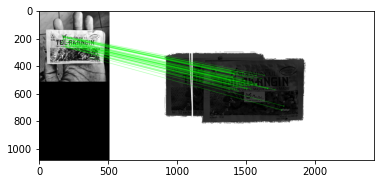

Not enough matches are found
Not enough matches are found
Not enough matches are found
Not enough matches are found
Not enough matches are found
Not enough matches are found


In [ ]:
for x in Data:
  MIN_MATCH_COUNT = 10
  # Initiate SIFT detector
  sift = cv2.xfeatures2d.SIFT_create()

  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(equalizedTarget,None)
  kp2, des2 = sift.detectAndCompute(x,None)

  #using FLANN Matcher
  FLANN_INDEX_KDTREE = 0
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks = 50)

  flann = cv2.FlannBasedMatcher(index_params, search_params)

  matches = flann.knnMatch(des1,des2,k=2)

  # store all the good matches as per Lowe's ratio test.
  good = []
  for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
  
  if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = equalizedTarget.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(x,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

    img3 = cv2.drawMatches(equalizedTarget,kp1,x,kp2,good,None,**draw_params)

    plt.imshow(img3, 'gray'),plt.show()

  else:
    print("Not enough matches are found") 
    matchesMask = None

